In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("sales_data_with_discounts.csv")

In [3]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [6]:
df.describe()
# decriptive statistics for float and int data types

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [7]:
# Selecting numerical columns
# Ploting histograms for each numerical column
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

In [8]:
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

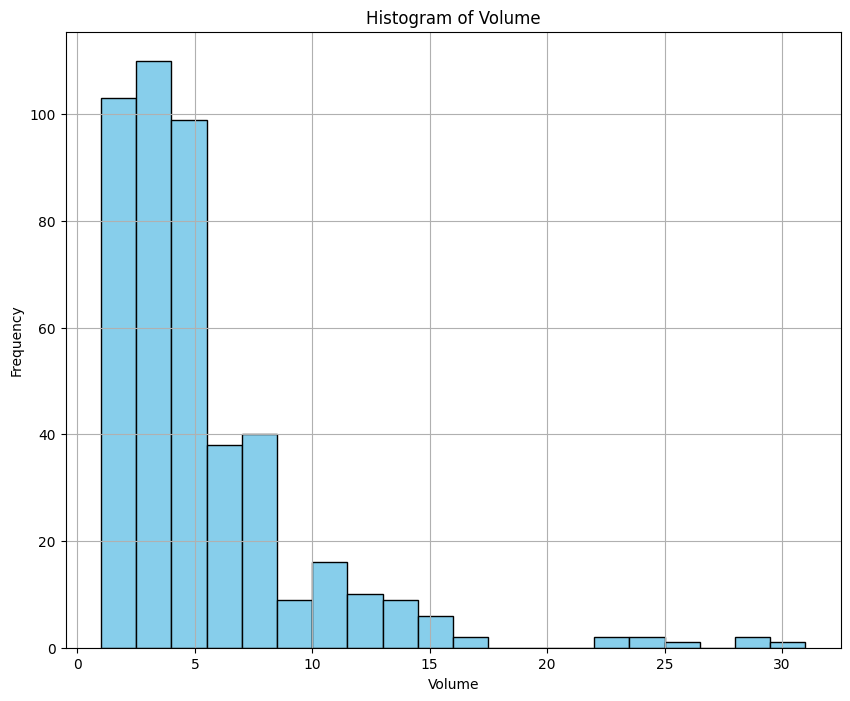

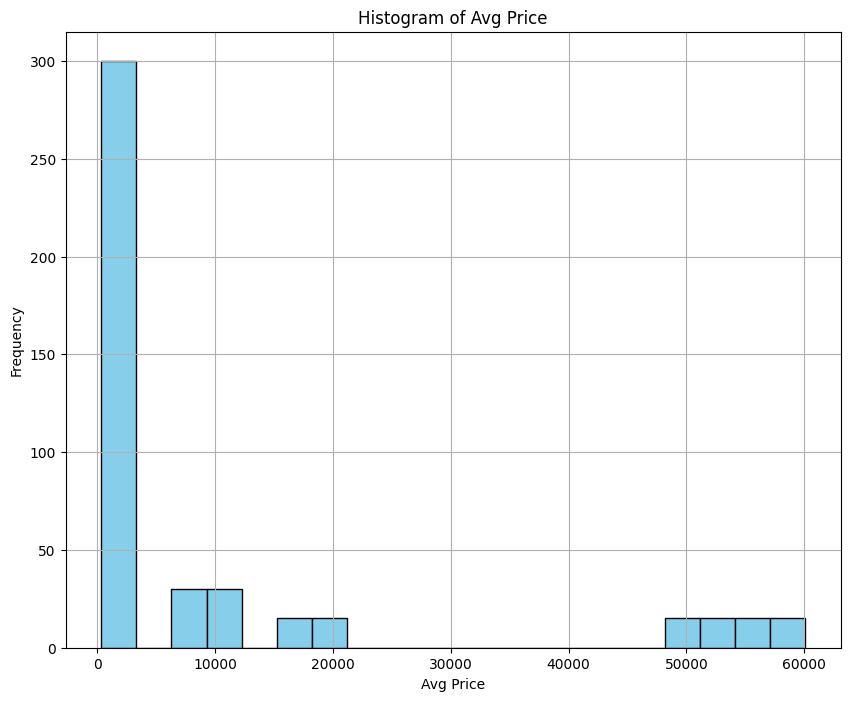

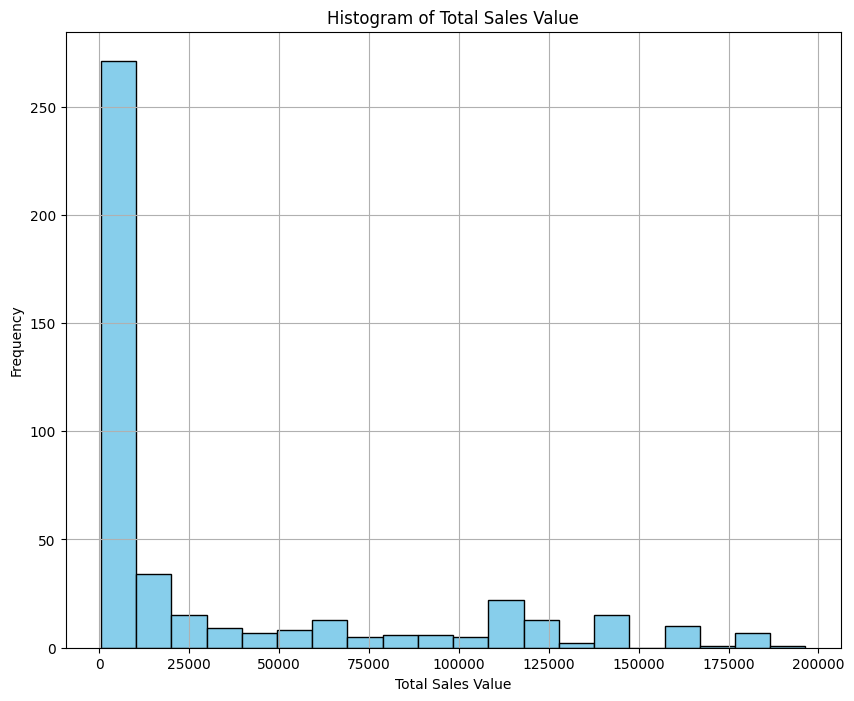

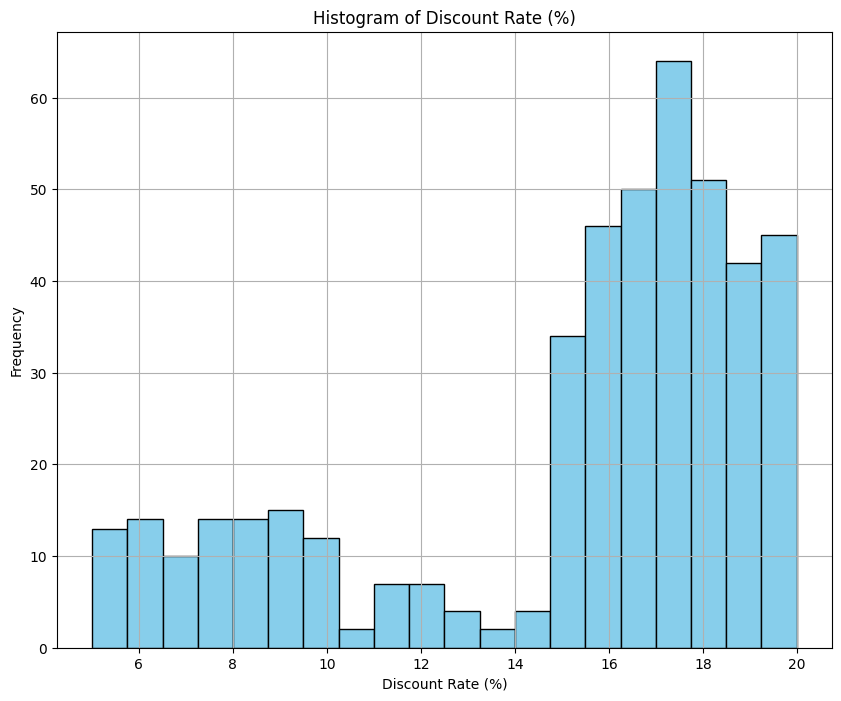

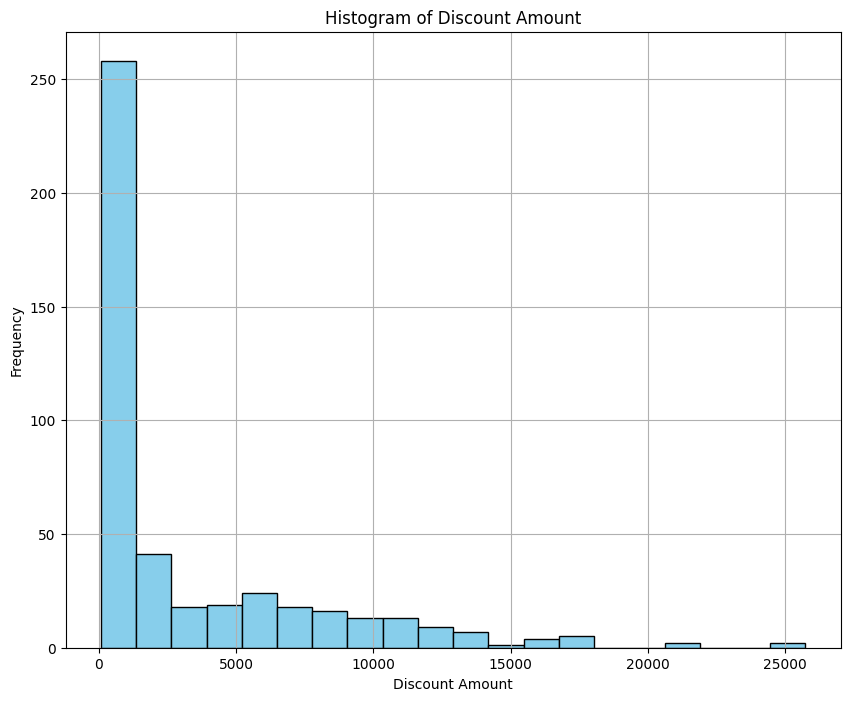

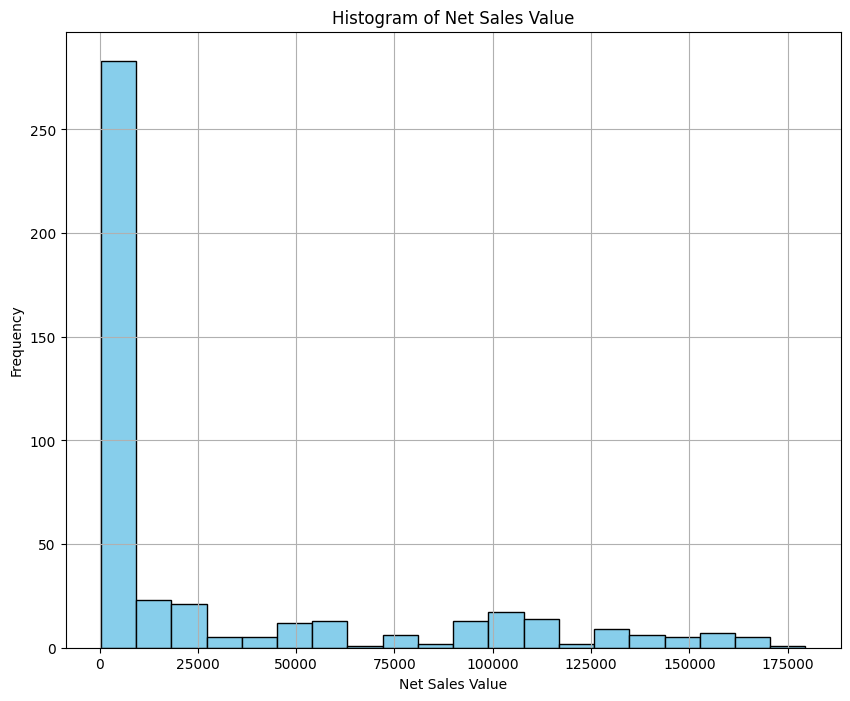

In [11]:
for column in numerical_columns:
    plt.figure(figsize=(10, 8))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

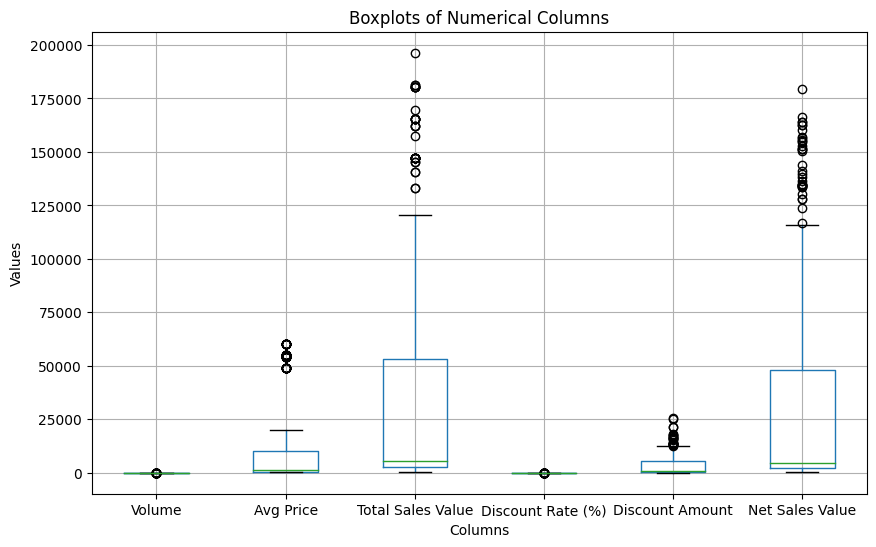

In [20]:
# Create boxplots for numerical variables
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Boxplots of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


In [21]:
# Selecting categorical columns
# Bar Chart Analysis for Categorical Column
categorical_columns = df.select_dtypes(include=['object']).columns

In [22]:
categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [23]:
# date , day and Sku is not required.drop them
categorical_columns=categorical_columns.drop(['Date','Day','SKU'])

In [24]:
categorical_columns

Index(['City', 'BU', 'Brand', 'Model'], dtype='object')

In [25]:
df.City.value_counts()

,count
City,
C,450


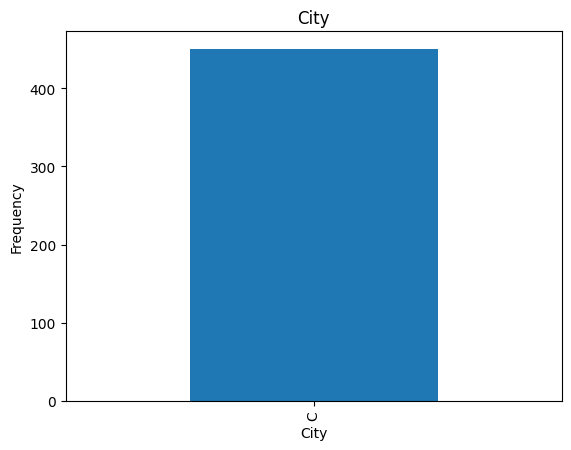

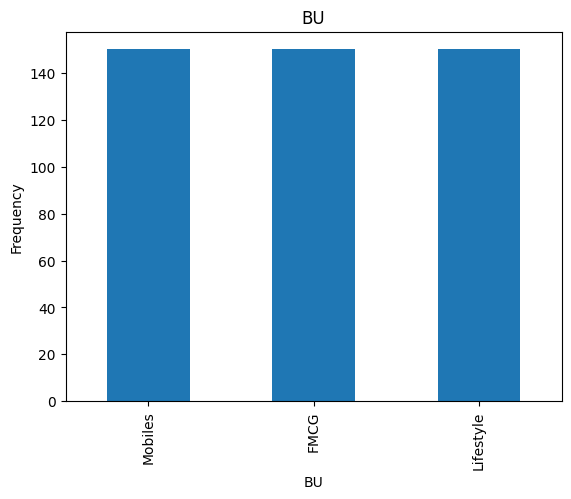

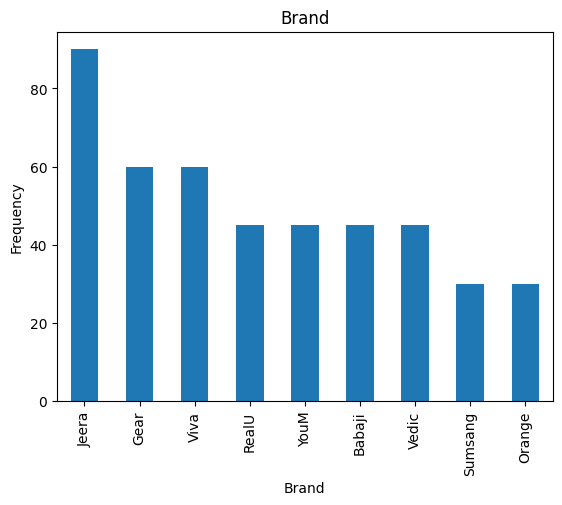

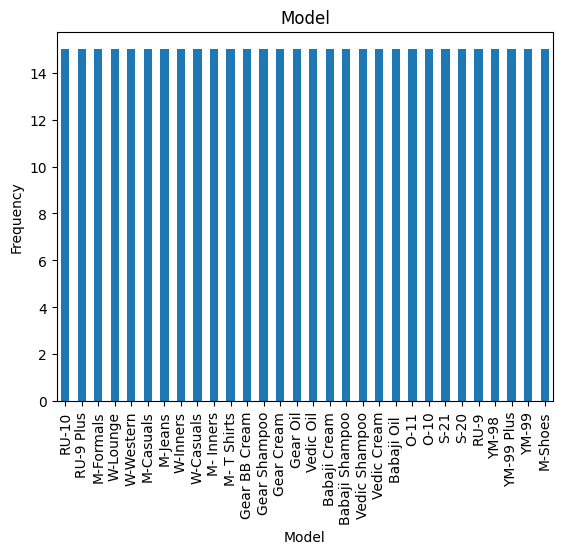

In [26]:
# Create bar charts for categorical columns
for col in categorical_columns:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.ylabel('Frequency')
    plt.show()


In [27]:
# all models have eual proportion of sales

In [29]:
#Standardization
def standardize_column(column):
    mean = column.mean()
    std_dev = column.std()
    standardized_column = (column - mean) / std_dev
    return standardized_column

In [30]:
# Applying standardization to each numerical column
for column in numerical_columns:
    df[column] = standardize_column(df[column])

# Now, numerical columns are standardized
print(df[numerical_columns].head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


In [33]:
# Standardization (Z-score normalization)
from scipy.stats import zscore

# Apply z-score normalization
df_standardized = df.copy()
df_standardized[numerical_columns] = df[numerical_columns].apply(zscore)

# Show before and after comparisons
print("Before Standardization:\n", df[numerical_columns].describe())
print("After Standardization:\n", df_standardized[numerical_columns].describe())


Before Standardization:
              Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  4.500000e+02  4.500000e+02       4.500000e+02       4.500000e+02   
mean   4.144833e-17  4.342206e-17       1.578984e-17      -4.144833e-17   
std    1.000000e+00  1.000000e+00       1.000000e+00       1.000000e+00   
min   -9.610229e-01 -5.621398e-01      -6.611811e-01      -2.404259e+00   
25%   -4.883887e-01 -5.524605e-01      -6.156681e-01      -2.819928e-01   
50%   -2.520716e-01 -4.979801e-01      -5.563034e-01       3.370428e-01   
75%    2.205626e-01 -1.954841e-02       3.836378e-01       7.011977e-01   
max    6.128490e+00  2.745953e+00       3.217313e+00       1.146084e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -6.315935e-17     1.973730e-17  
std       1.000000e+00     1.000000e+00  
min      -7.266945e-01    -6.501345e-01  
25%      -6.399340e-01    -6.096839e-01  
50%      -5.227531e-01    -5.562833e-01  
75%  

In [38]:
# Converting numerical columns into dummy variables
dummy_df = pd.get_dummies(df[categorical_columns])

dummy_df=dummy_df.astype(int)

# Concatenating the original DataFrame with the dummy variables
df_with_dummies = pd.concat([df.drop(categorical_columns, axis=1), dummy_df], axis=1)

# Now, df_with_dummies contains the original DataFrame with numerical columns converted to dummy variables
print(df_with_dummies.head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0         2.801638                1                0                0   
1         1.269613                1                0                0   
2         1.543957                1                0                0   
3         1.763847                1                0                0   
4        -0.227342                1                0                0   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0          